In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [18]:
os.chdir('/Users/TigeressQueen/Downloads/Python for Data Science/DS_mod14/')

In [19]:
dataset = pd.read_csv('glass.csv')

In [4]:
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [50]:
dataset.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [20]:
x = dataset.iloc[:,:-1]

In [21]:
y = dataset.iloc[:,-1]

In [22]:
from sklearn.preprocessing import StandardScaler

sc_data = StandardScaler()
x = sc_data.fit_transform(x)

In [48]:
np.unique(dataset['Type'])

array([1, 2, 3, 5, 6, 7])

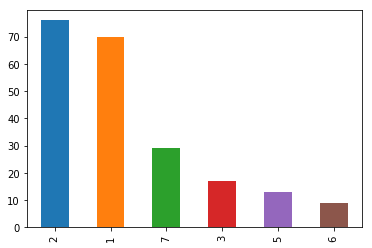

In [13]:
dataset['Type'].value_counts().plot(kind='bar')

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)
classifier = DecisionTreeClassifier()
classifier.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
y_predict = classifier.predict(test_x)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(test_y, y_predict)
ac = accuracy_score(test_y, y_predict)
print (cm, '\n', ac)

[[14  4  1  0  0  0]
 [ 2  8  0  1  1  0]
 [ 1  2  3  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]] 
 0.7209302325581395


In [44]:
from sklearn.model_selection import cross_val_score

classifier.fit(train_x, train_y)
accuracy_score = cross_val_score(classifier, train_x, train_y, cv=3)
accuracy_mean = accuracy_score.mean()
print (accuracy_score, '\n', accuracy_mean)

[0.6779661  0.66666667 0.67272727] 
 0.6724533470296182


In [45]:
y_predict = classifier.predict(test_x)
print(confusion_matrix(y_predict,test_y))

[[14  2  2  0  0  0]
 [ 3  8  1  0  0  0]
 [ 1  0  3  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 1  1  0  0  0  4]]


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

ran_classifier = RandomForestClassifier(random_state=1)

hyperparameter = {'n_estimators' : [1,2,4,8,16]}

grid = GridSearchCV(ran_classifier, param_grid=hyperparameter, cv=10)
grid.fit(train_x, train_y)
best_estimator = grid.best_estimator_
best_score = grid.best_score_
best_param = grid.best_params_

print (best_estimator)
print (best_score)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
0.7719298245614035


In [92]:
y_prediction = grid.predict(test_x)

In [93]:
cm = confusion_matrix(y_prediction, test_y)

In [94]:
cm

array([[17,  3,  3,  0,  0,  0],
       [ 1,  7,  2,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  4]])